In [1]:
import pandas as pd 
from utils import (
    load_survey_responses,
    process_survey_responses,
    process_final_responses,
    aggregate_user_responses
)
import config


In [2]:
print("Loading survey responses...")
survey_df = load_survey_responses("../survey_results/survey_response/", config.SURVEY_RESPONSES_PATTERN)

Loading survey responses...


In [3]:
survey_df.columns

Index(['user_id', 'age', 'gender', 'marital_status', 'has_children',
       'nationality', 'city', 'disability', 'pets', 'profession', 'hobbies',
       'interests', 'travel_experience', 'preferred_travel_style', 'poi_id',
       'poi_title', 'is_manual_first', 'manual_significance', 'manual_trust',
       'manual_clarity', 'ai_significance', 'ai_trust', 'ai_clarity',
       'engaging_preference', 'relevant_preference', 'eager_preference',
       'title_preference', 'description_preference', 'already_visited',
       'timestamp'],
      dtype='object')

In [4]:
survey_df

,user_id,age,gender,marital_status,has_children,nationality,city,disability,pets,profession,...,ai_significance,ai_trust,ai_clarity,engaging_preference,relevant_preference,eager_preference,title_preference,description_preference,already_visited,timestamp
0,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have never heard of it before.,2024-12-16T12:55:40.540271
1,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have never heard of it before.,2024-12-16T12:57:24.904851
2,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Neutral,Moderately,Neutral,Version A,Version A,Version A,Version A,Version A,I have never heard of it before.,2024-12-16T12:58:44.648347
3,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Agree,Moderately,Clear,Version A,Version A,Version B,Version A,Version A,I have never heard of it before.,2024-12-16T13:01:23.608229
4,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Neutral,Moderately,Neutral,Version A,Version A,Version A,Both equally,Both equally,I have never heard of it before.,2024-12-16T13:03:18.750496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,7d6d9947-09cb-45d8-a134-415cfc87c299,23,Male,Single,No,German,Bietigheim,No,No,Student,...,Disagree,Slightly,Neutral,Version A,Version A,Both equally,Version B,Version A,I have visited it in person.,2025-02-05T14:58:36.555090
506,7d6d9947-09cb-45d8-a134-415cfc87c299,23,Male,Single,No,German,Bietigheim,No,No,Student,...,Neutral,Not at all,Unclear,Version B,Version A,Both equally,Both equally,Version A,I have visited it in person.,2025-02-05T15:01:05.184466
507,7d6d9947-09cb-45d8-a134-415cfc87c299,23,Male,Single,No,German,Bietigheim,No,No,Student,...,Agree,Moderately,Unclear,Version A,Version B,Both equally,Version A,Both equally,I have visited it in person.,2025-02-05T15:02:10.128365
508,7d6d9947-09cb-45d8-a134-415cfc87c299,23,Male,Single,No,German,Bietigheim,No,No,Student,...,Neutral,Moderately,Neutral,Version B,Both equally,Both equally,Version A,Both equally,I have never heard of it before.,2025-02-05T15:03:43.711735


In [5]:

survey_df ['timestamp']= pd.to_datetime(survey_df['timestamp'])
# filter_date = pd.to_datetime('2025-01-28')
# survey_df = survey_df[survey_df['timestamp'] >= filter_date]
survey_df

,user_id,age,gender,marital_status,has_children,nationality,city,disability,pets,profession,...,ai_significance,ai_trust,ai_clarity,engaging_preference,relevant_preference,eager_preference,title_preference,description_preference,already_visited,timestamp
0,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have never heard of it before.,2024-12-16 12:55:40.540271
1,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have never heard of it before.,2024-12-16 12:57:24.904851
2,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Neutral,Moderately,Neutral,Version A,Version A,Version A,Version A,Version A,I have never heard of it before.,2024-12-16 12:58:44.648347
3,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Agree,Moderately,Clear,Version A,Version A,Version B,Version A,Version A,I have never heard of it before.,2024-12-16 13:01:23.608229
4,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Neutral,Moderately,Neutral,Version A,Version A,Version A,Both equally,Both equally,I have never heard of it before.,2024-12-16 13:03:18.750496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,7d6d9947-09cb-45d8-a134-415cfc87c299,23,Male,Single,No,German,Bietigheim,No,No,Student,...,Disagree,Slightly,Neutral,Version A,Version A,Both equally,Version B,Version A,I have visited it in person.,2025-02-05 14:58:36.555090
506,7d6d9947-09cb-45d8-a134-415cfc87c299,23,Male,Single,No,German,Bietigheim,No,No,Student,...,Neutral,Not at all,Unclear,Version B,Version A,Both equally,Both equally,Version A,I have visited it in person.,2025-02-05 15:01:05.184466
507,7d6d9947-09cb-45d8-a134-415cfc87c299,23,Male,Single,No,German,Bietigheim,No,No,Student,...,Agree,Moderately,Unclear,Version A,Version B,Both equally,Version A,Both equally,I have visited it in person.,2025-02-05 15:02:10.128365
508,7d6d9947-09cb-45d8-a134-415cfc87c299,23,Male,Single,No,German,Bietigheim,No,No,Student,...,Neutral,Moderately,Neutral,Version B,Both equally,Both equally,Version A,Both equally,I have never heard of it before.,2025-02-05 15:03:43.711735


In [6]:
import matplotlib.pyplot as plt

def plot_graph(df,cat_type, column_name1, column_name2, title):
   

    # Convert columns to categorical type
    df[column_name1] = df[column_name1].astype(cat_type)
    df[column_name2] = df[column_name2].astype(cat_type)

    # Calculate value counts with the ordered categories
    manual_counts = df[column_name1].value_counts().sort_index()
    ai_counts = df[column_name2].value_counts().sort_index()
    print(f"Manual counts: {manual_counts}, AI counts: {ai_counts}")
    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Set the positions of the bars
    x = range(len(cat_type.categories))
    width = 0.35

    # Create bars
    plt.bar([i - width/2 for i in x], manual_counts, width, 
            label=column_name1, color='#2ecc71')
    plt.bar([i + width/2 for i in x], ai_counts, width, 
            label=column_name2, color='#3498db')

    # Customize the plot
    plt.xlabel('Rating Scale')
    plt.ylabel('Number of Responses')
    plt.title(title)
    plt.xticks(x, cat_type.categories)
    plt.legend()

    # Add value labels on top of bars
    for i, v in enumerate(manual_counts):
        plt.text(i - width/2, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(ai_counts):
        plt.text(i + width/2, v, str(v), ha='center', va='bottom')

    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Show the plot
    plt.show()


Manual counts: manual_significance
Strongly Disagree      7
Disagree              21
Neutral              138
Agree                281
Strongly Agree        63
Name: count, dtype: int64, AI counts: ai_significance
Strongly Disagree      8
Disagree              24
Neutral              118
Agree                276
Strongly Agree        84
Name: count, dtype: int64


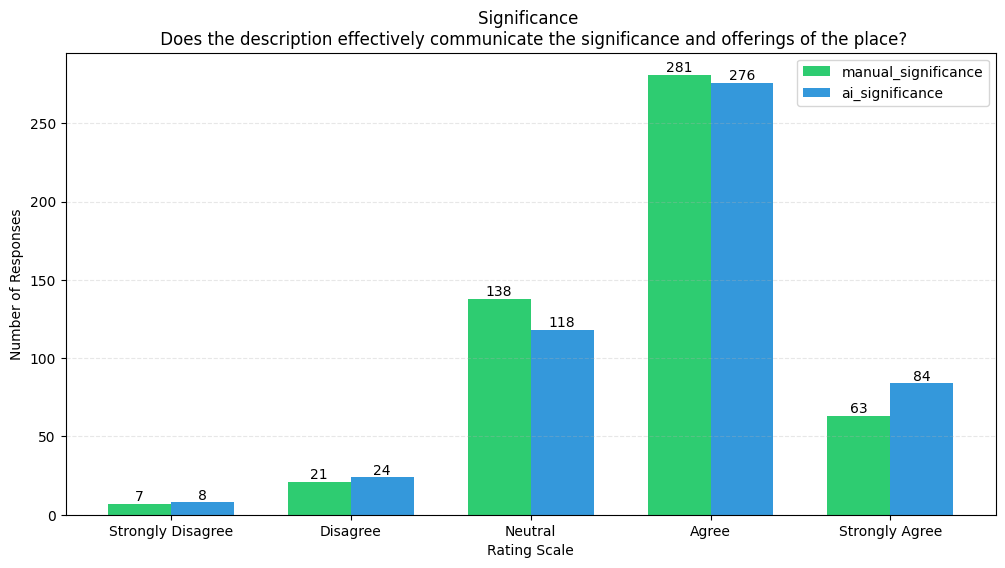

In [7]:
# Does the description effectively communicate the significance and offerings of the place?
cat_type = pd.CategoricalDtype(
        categories=['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'],
        ordered=True
    )
plot_graph(survey_df,cat_type, 'manual_significance','ai_significance', 'Significance \n Does the description effectively communicate the significance and offerings of the place?')

Manual counts: manual_trust
Not at all      8
Slightly       43
Moderately    170
Very          235
Extremely      54
Name: count, dtype: int64, AI counts: ai_trust
Not at all      4
Slightly       33
Moderately    140
Very          261
Extremely      72
Name: count, dtype: int64


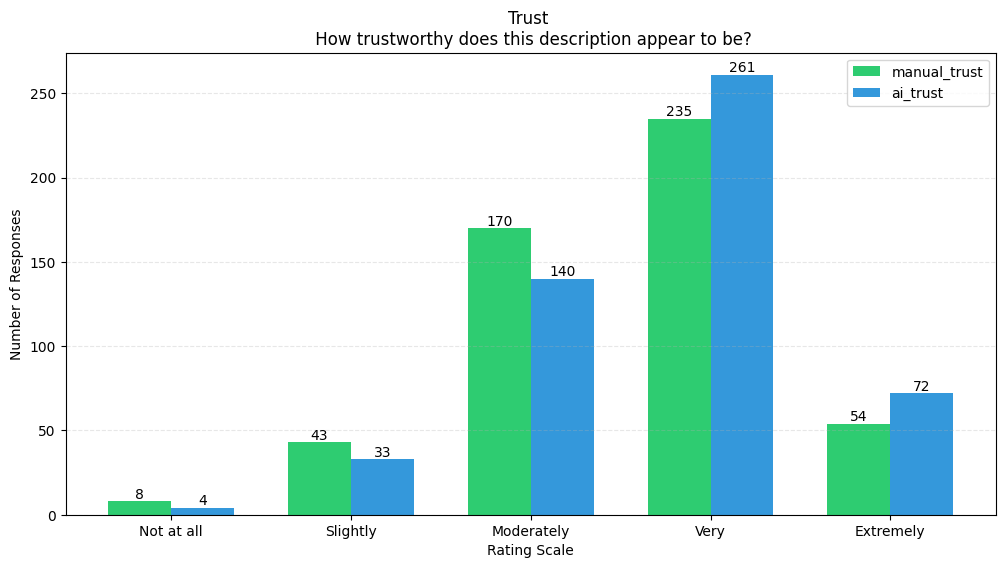

In [9]:
# How trustworthy does this description appear to be?
cat_type = pd.CategoricalDtype(
        categories=["Not at all", "Slightly", "Moderately", "Very", "Extremely"],
        ordered=True
    )
plot_graph(survey_df,cat_type, 'manual_trust','ai_trust', 'Trust \n How trustworthy does this description appear to be?')

Manual counts: manual_clarity
Very Unclear      3
Unclear          33
Neutral         147
Clear           260
Very Clear       67
Name: count, dtype: int64, AI counts: ai_clarity
Very Unclear      5
Unclear          24
Neutral         109
Clear           284
Very Clear       88
Name: count, dtype: int64


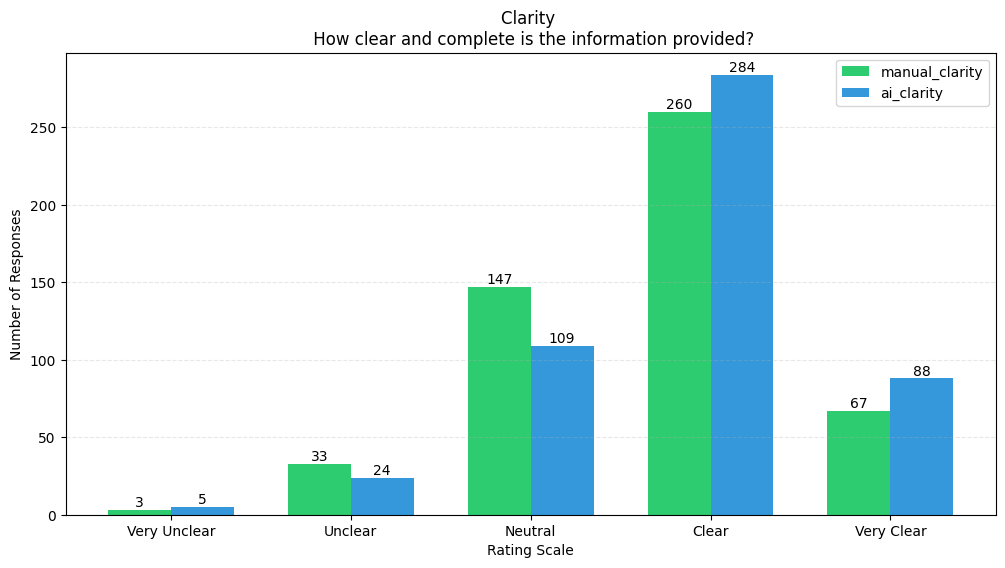

In [8]:
cat_type = pd.CategoricalDtype(
        categories=["Very Unclear", "Unclear", "Neutral", "Clear", "Very Clear"],
        ordered=True
    )
plot_graph(survey_df,cat_type, 'manual_clarity','ai_clarity', 'Clarity \n How clear and complete is the information provided?')

engaging_preference: engaging_preference
No Selection      0.0
Manual          220.0
AI Generated    221.0
Both equally     69.0
Name: count, dtype: float64
relevant_preference: relevant_preference
No Selection      0.0
Manual          272.0
AI Generated    150.0
Both equally     88.0
Name: count, dtype: float64
eager_preference: eager_preference
No Selection      0.0
Manual          223.0
AI Generated    210.0
Both equally     77.0
Name: count, dtype: float64
title_preference: title_preference
No Selection      0.0
Manual          247.0
AI Generated    171.0
Both equally     92.0
Name: count, dtype: float64
description_preference: description_preference
No Selection      0.0
Manual          245.0
AI Generated    181.0
Both equally     84.0
Name: count, dtype: float64


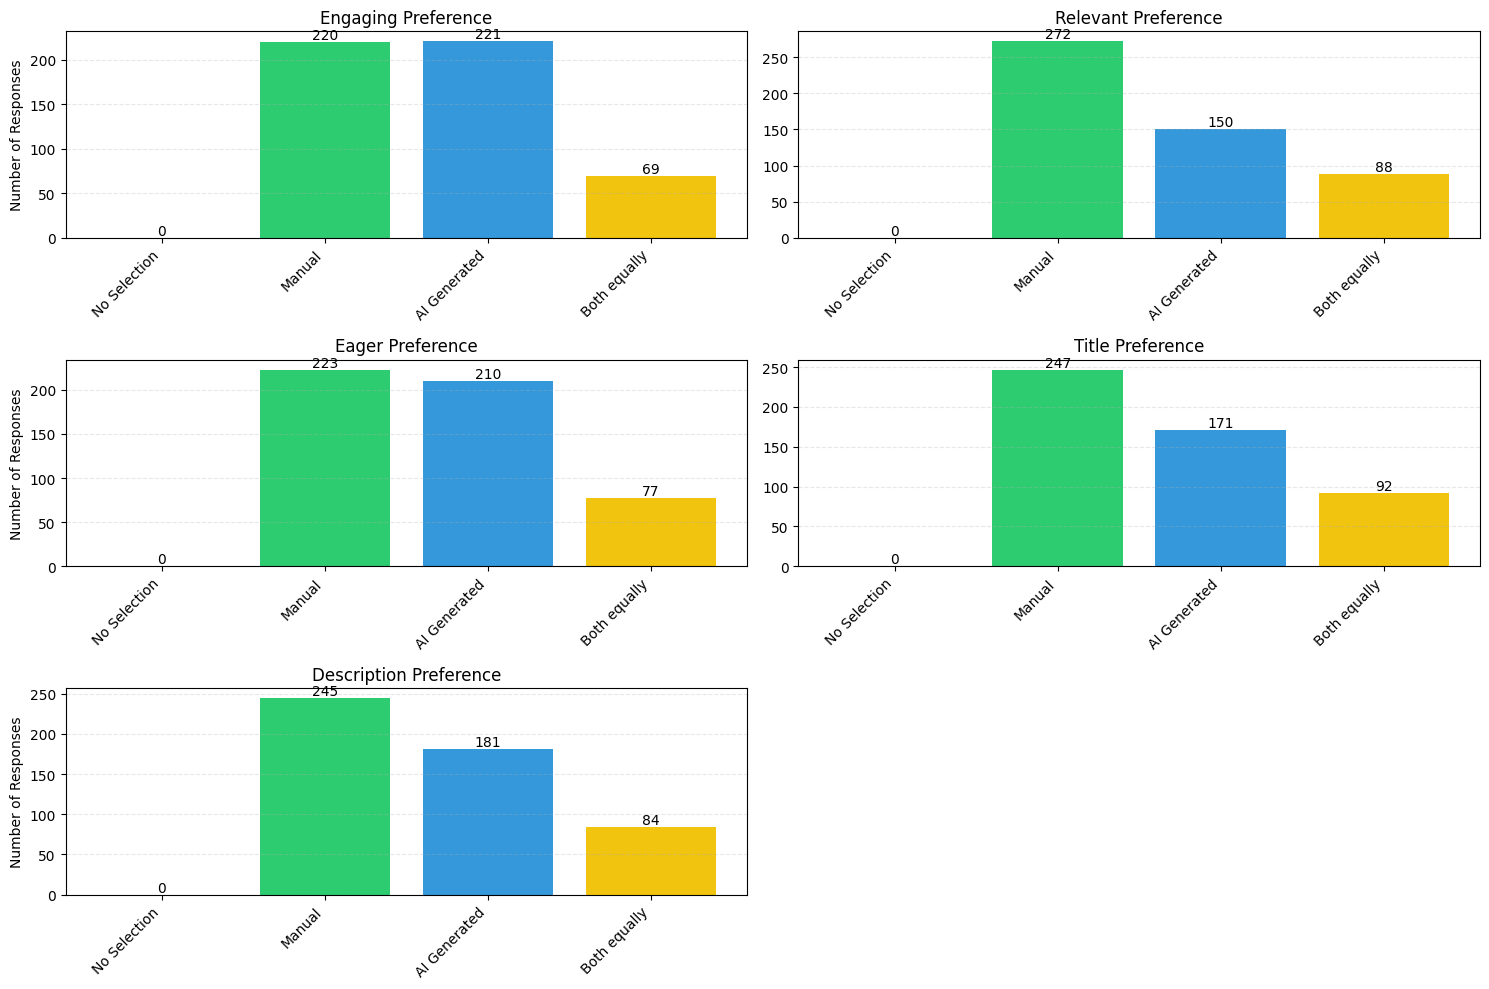

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data


# List of preference columns
preference_columns = [
    'engaging_preference', 
    'relevant_preference', 
    'eager_preference',
    'title_preference', 
    'description_preference'
]

# Function to replace versions based on is_manual_first
def replace_versions(row, column):
    value = row[column]
    if value in ['Version A', 'Version B']:
        if row['is_manual_first']:
            return 'Manual' if value == 'Version A' else 'AI Generated'
        else:
            return 'AI Generated' if value == 'Version A' else 'Manual'
    return value

# Apply the replacement for each preference column
for col in preference_columns:
    survey_df[col] = survey_df.apply(lambda row: replace_versions(row, col), axis=1)

# Create subplots for each preference
plt.figure(figsize=(15, 10))

# Define colors for each category
colors = {
    'No Selection': '#95a5a6',
    'Manual': '#2ecc71',
    'AI Generated': '#3498db',
    'Both equally': '#f1c40f'
}

# Define the order of categories
categories = ['No Selection', 'Manual', 'AI Generated', 'Both equally']

for i, column in enumerate(preference_columns, 1):
    plt.subplot(3, 2, i)
    
    # Count values and reindex to ensure all categories are present
    
    value_counts = survey_df[column].value_counts().reindex(categories).fillna(0)
    print(f"{column}: {value_counts}")
    
    # Create bar plot
    bars = plt.bar(value_counts.index, value_counts.values, 
                  color=[colors[cat] for cat in value_counts.index])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # Customize each subplot
    plt.title(column.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Add y-label only for leftmost plots
    if i % 2 == 1:
        plt.ylabel('Number of Responses')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
survey_df['engaging_preference'].value_counts()

engaging_preference
AI Generated    221
Manual          220
Both equally     69
Name: count, dtype: int64

# loading final

In [13]:
final_response= pd.read_csv("./processed_data/processed_final_responses.csv")

In [14]:
final_response

,timestamp,overall_rating,comments,adaptation_rating,ai_comfort_rating,final_feedback,lottery_email,response_date,response_time
0,2025-01-26 04:50:32.387757,4.0,NaN,4.0,4.0,NaN,vikasalha@gmail.com,2025-01-26,04:50:32.387757
1,2025-01-27 18:27:01.006977,4.0,NaN,4.0,5.0,NaN,skycool2408@gmail.com,2025-01-27,18:27:01.006977
2,2025-01-25 12:32:34.044795,3.0,NaN,3.0,2.0,NaN,NaN,2025-01-25,12:32:34.044795
3,2024-12-18 08:54:40.324446,4.0,NaN,3.0,3.0,NaN,deepsynergy@gmail.com,2024-12-18,08:54:40.324446
4,2025-01-25 10:54:45.854198,NaN,NaN,NaN,NaN,NaN,unniashish13@gmail.com,2025-01-25,10:54:45.854198
5,2025-01-26 17:13:34.054604,4.0,NaN,5.0,5.0,NaN,NaN,2025-01-26,17:13:34.054604
6,2025-01-27 17:22:51.556760,4.0,NaN,4.0,4.0,NaN,gopalnayak.13@gmail.com,2025-01-27,17:22:51.556760
7,2025-01-25 17:10:49.560429,4.0,NaN,4.0,4.0,Satisfied,n.nitinsinha@gmail.com,2025-01-25,17:10:49.560429
8,2025-01-26 05:38:38.423458,NaN,NaN,NaN,NaN,It was a great experience to think through and...,swapnilsharma1@hotmail.com,2025-01-26,05:38:38.423458
9,2025-01-25 12:36:49.080825,4.0,NaN,5.0,4.0,AI generate descriptions are very engaging and...,ameer_khan.ali@outlook.com,2025-01-25,12:36:49.080825


In [15]:
#How would you rate your overall experience with the POI descriptions provided in this study?
print(f'How would you rate your overall experience with the POI descriptions provided in this study? \n \t {final_response['overall_rating'].mean(skipna=True)}')


How would you rate your overall experience with the POI descriptions provided in this study? 
 	 3.8823529411764706


In [16]:
#What is your opinion on the idea of automatically adapting POI descriptions based on user interests?
print(f'What is your opinion on the idea of automatically adapting POI descriptions based on user interests? \n \t {final_response['adaptation_rating'].mean(skipna=True)}')


What is your opinion on the idea of automatically adapting POI descriptions based on user interests? 
 	 3.75


In [17]:
#How comfortable are you with reading AI-generated descriptions when planning visits to new places?
print(f'How comfortable are you with reading AI-generated descriptions when planning visits to new places? \n \t {final_response['ai_comfort_rating'].mean(skipna=True)}')

How comfortable are you with reading AI-generated descriptions when planning visits to new places? 
 	 3.9411764705882355


In [ ]:
import scipy.stats as stats
import numpy as np

# trust
# Contingency Table
data = np.array([
    [72, 54],
    [261, 235],
    [140, 170],
    [33, 43],
    [4, 8]
])

chi2, p, dof, expected = stats.chi2_contingency(data)

print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-square statistic: 9.49, p-value: 0.0500


In [18]:
import scipy.stats as stats
import numpy as np

# significance
# Contingency Table
data = np.array([
    [84, 63],
    [276, 281],
    [118, 138],
    [24, 21],
    [8, 7]
])

chi2, p, dof, expected = stats.chi2_contingency(data)

print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")


Chi-square statistic: 4.87, p-value: 0.3005


In [5]:
import scipy.stats as stats
import numpy as np

# Clarity
# Contingency Table
data = np.array([
    [88, 67],
    [284, 260],
    [109, 147],
    [24, 33],
    [5, 3]
])

chi2, p, dof, expected = stats.chi2_contingency(data)

print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-square statistic: 11.47, p-value: 0.0218
